# Import Libraries & Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

In [5]:
df = pd.read_csv('energy_efficiency.csv')
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [6]:
df.shape

(768, 10)

In [7]:
df.columns

Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'orientation', 'glazing_area',
       'glazing_area_distribution', 'heating_load', 'cooling_load'],
      dtype='object')

In [8]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


# checking Null Values

In [9]:
df.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [10]:
df = df.drop_duplicates()

# Split Data

In [11]:
# Features & Target
X = df.drop(['heating_load', 'cooling_load'], axis=1)
y = df[['heating_load', 'cooling_load']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Scaling

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model

In [14]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [15]:
print("mse", mean_squared_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))

mse 1.9757976528896062
r2_score 0.9788225922996614


# Visualizations of Targets

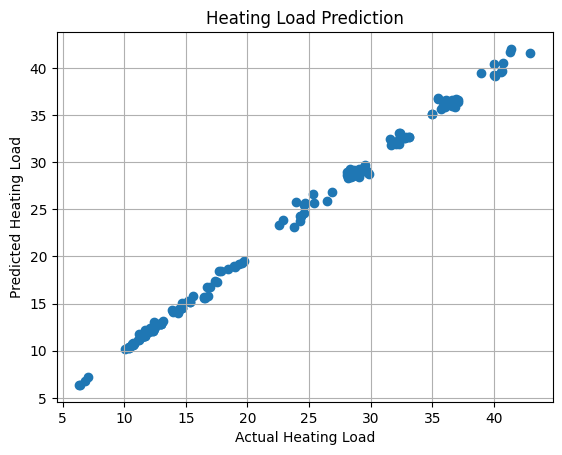

In [17]:
# Heating Load Plot
plt.figure()
plt.scatter(y_test["heating_load"], y_pred[:,0])
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Heating Load Prediction")
plt.grid(True)
plt.show()

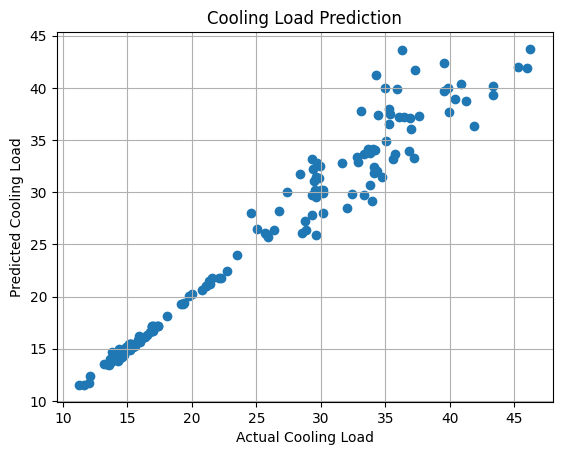

In [18]:
# Cooling Load Plot
plt.figure()
plt.scatter(y_test["cooling_load"], y_pred[:,1])
plt.xlabel("Actual Cooling Load")
plt.ylabel("Predicted Cooling Load")
plt.title("Cooling Load Prediction")
plt.grid(True)
plt.show()

# Save Model & Scaler for Deployment

In [ ]:
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

#                           Streamlit Deployment Code (app.py)